<a href="https://colab.research.google.com/github/Cstan1987stat/health-survey-cluster-analysis/blob/main/univariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading in the adult22 csv file.
df <- read.csv("https://raw.githubusercontent.com/Cstan1987stat/health-survey-cluster-analysis/refs/heads/main/adult22_filtered.csv")

# Extracting the number of rows from df
rows <- dim(df)[1]
# Extracting the number of columnbs from df
columns <- dim(df)[2]
# Outputing the number of rows and columns
cat('There are', rows,'rows and', columns,'columns in the data.\n')
# Outputing horizontal line for separation purposes
cat('---------------------------------------------------------------------------------------------------\n')
# Outputing blank line
cat('\n')
# Printing the first 6 rows of the data
print(head(df))

There are 20361 rows and 14 columns in the data.
---------------------------------------------------------------------------------------------------

  Age Sex Cancer Coronary_heart_disease Depression Smoked_100_cig Education
1  64   1      1                      1          2              1         8
2  37   2      2                      2          2              2         8
3  72   2      2                      2          2              2         5
4  84   2      2                      2          2              2         6
5  31   2      2                      2          2              1         8
6  81   2      1                      2          2              2         4
  Region Anxiety Height Weight Sleep_hours Aerobic.Strength Alcohol_drink_12m
1      3       4     74    235           8                3               108
2      3       3     69    218           9                3                 0
3      3       5     64    240           8                1                12
4     

In [2]:
# Loading in packages
library(dplyr)
library(data.table)
install.packages("gridExtra") # Need to first install gridExtra package
library(ggplot2)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Univariate Analysis

## Numerical Variables

### Summary Statistics

In [3]:
# Creating a custom function to calculate the summary statistics for the given features.
summ_stats <- function(data) {
  # Creating empty list to hold the values.
  summary_list <- list()

  # Iterating through each column.
  for (col in names(data)) {
      # For the given column, calculate the summary stats.
      summary_list[[col]] <- c(
        Min = round(min(data[[col]]),2),
        Q = round(quantile(data[[col]], .25),2),
        Mean = round(mean(data[[col]]),2),
        Median = round(median(data[[col]]),2),
        Q = round(quantile(data[[col]], .75),2),
        Max = round(max(data[[col]]),2),
        SD = round(sd(data[[col]]),2)
      )
  }

  # Create the dataframe based on what is in the summary_list
  summary_df <- as.data.frame(do.call(rbind, summary_list))
  # Transpose the data frame
  t(summary_df)
}

In [4]:
# Creating a vector for the numeric column names
num_cols <- c("Age", "Height", "Weight", "Sleep_hours", "Alcohol_drink_12m")
# Selecting the numeric columns from df, and computing the summary statistics.
print(summ_stats(df[, num_cols]))

         Age Height Weight Sleep_hours Alcohol_drink_12m
Min    18.00  59.00 100.00        1.00              0.00
Q.25%  37.00  64.00 150.00        6.00              2.00
Mean   52.14  66.89 179.32        7.09             67.68
Median 54.00  67.00 175.00        7.00             24.00
Q.75%  67.00  70.00 204.00        8.00            104.00
Max    84.00  76.00 299.00       24.00            365.00
SD     17.37   3.87  39.56        1.35             97.45


* **Age** : The average age is 52.14, with a median of 54 and a standard deviation of 17.38.
* **Height** : The average height is 66.89, with a median of 67 and a standard deviation of 3.87.
* **Weight** : The average weight is 179.32, with a median of 175 and a standard deviation of 39.56.
* **Sleep_hours** : The average hours of sleep is 7.09, with a median of 7 and a standard deviation of 1.35.
* **Alcohol_drink_12m** : The average drinks in the past 12 months is 67.68, with a median of 24 and a standard deviation of 97.45.

### Density Plots

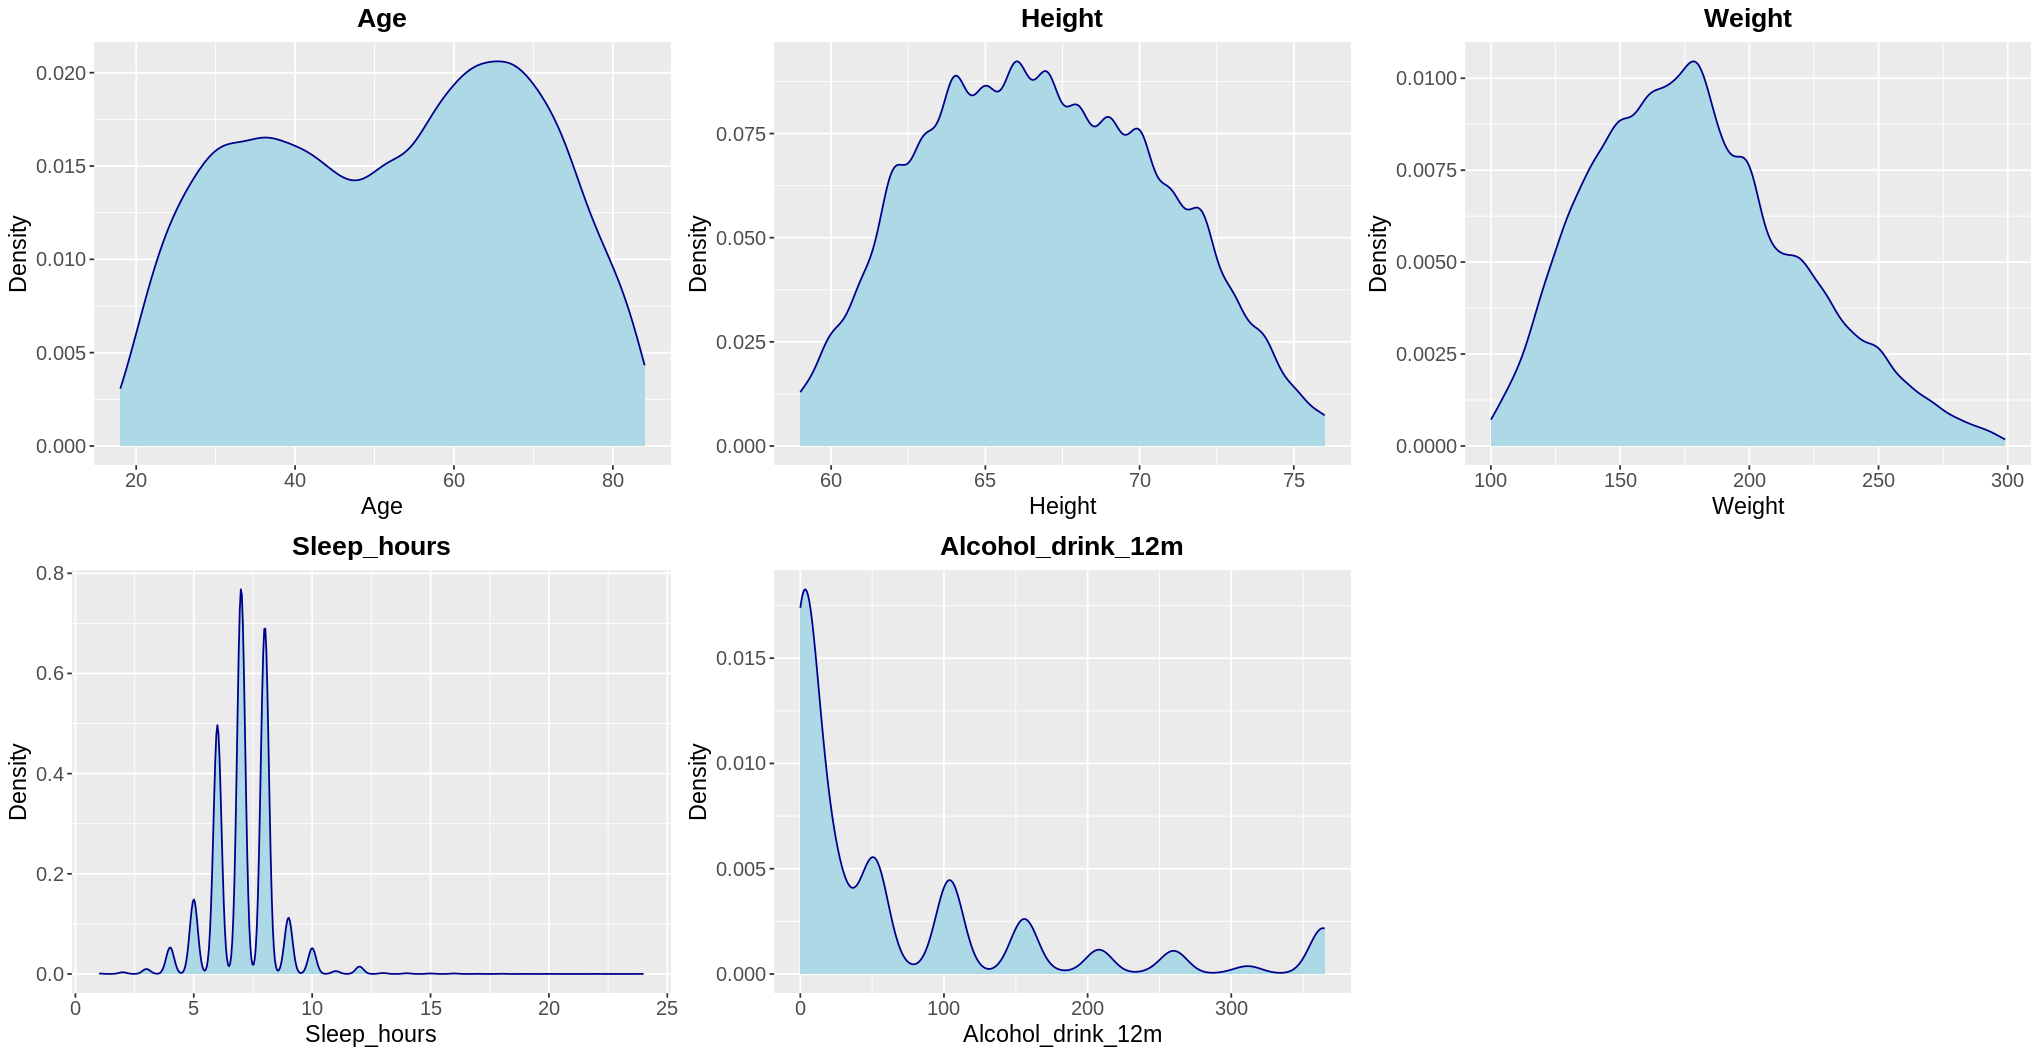

In [5]:
# Set custom plot dimensions
options(repr.plot.width = 17, repr.plot.height = 8.8)

# Function to create density plot for a given column
plot_density <- function(data, col_name) {
  ggplot(data, aes(x = .data[[col_name]])) +   # Dynamically reference column names

    # Add density plot with custom colors
    geom_density(fill = "lightblue", color = "darkblue") +
    # Add title and axis labels
    labs(title = col_name, x = col_name, y = "Density") +
    # Adjusting the text appearance
    theme(axis.text.x = element_text(size=12),
      axis.text.y = element_text(size=12),
      axis.title.x = element_text(size=14),
      axis.title.y = element_text(size=14),
      plot.title = element_text(size=16, hjust = 0.5, face='bold'),
      plot.subtitle = element_text(size=14, hjust=0.5))
}

# Create a list of density plots for each numeric column
plots <- lapply(names(df[, num_cols]), function(col_name) {
  plot_density(df[, num_cols], col_name)
})

# Arranging all the plots in a grid layout with 3 columns
grid.arrange(grobs = plots, ncol = 3)

* **Age** - The distribution of Age is bimodal, with a smaller peak near 35 years old and the larger peak occuring around 60-70 years old. The dominance of the older individuals indicate the dataset's sample adult population has a higher proportion of individuals that are older compared to younger people.
* **Height** - The distribution of Height is approximately unimodal with some flucuations, with the largest peak occuring around 66 inches. The slight right skew indicates that the dataset includes a greater number of shorter individuals compared to taller ones, though the skew is mild.
* **Weight** - The distribution of Weight is unimodal, with the largest peak occuring between 150 and 200 pounds. The right skew suggest a higher proportion of individuals weight less compared to those with higher weights.
* **Sleep_hours** - he distribution of Sleep Hours is multimodal, with the largest peak at around 7 hours, followed by smaller peaks at 8 hours and 6 hours. The presence of extreme value such as 24 hours raises questions about data quality and or potential reporting errors.
* **Alcohol_drink_12m** - The distribution of Alcohol Consumption is multimodal, with the largest peak around 0 drinks, followed by smaller peaks at 50 and 100 drinks. This indicates a majority of individuals drink infrequently, while a smaller portion consume alcohol more regularly, potentially reflecting social or lifestyle differences.

### Boxplots


What is a boxplot?
* The middle line inside of the box (or colored rectangle) is the median (Q2), which splits the data into two equal halves: 50% of the data is below the median, and 50% is above it.
* The left edge of the box represents the 25th percentile (Q1), meaning 25% of the data is below this value, and 75% is above it.
* The right edge of the box represents the 75th percentile (Q3), meaning 75% of the data is below this value, and 25% is above it.
* The box itself represents the interquartile range (iqr = Q3 - Q1), which contains the middle 50% of the data.
* The horizontal lines (whiskers) extend from the edges of the box to the most extreme non-outlier value within a specific range:
 - The upper (right) whisker extends to the largest value that is less than or equal to (Q3 + 1.5 * iqr).
 - The lower (left) whisker extends to the smallest vlaues that is greater than or equal to (Q1 - 1.5 * iqr).
* Any data points outside this range are considered outliers, and will be represents by individual points.

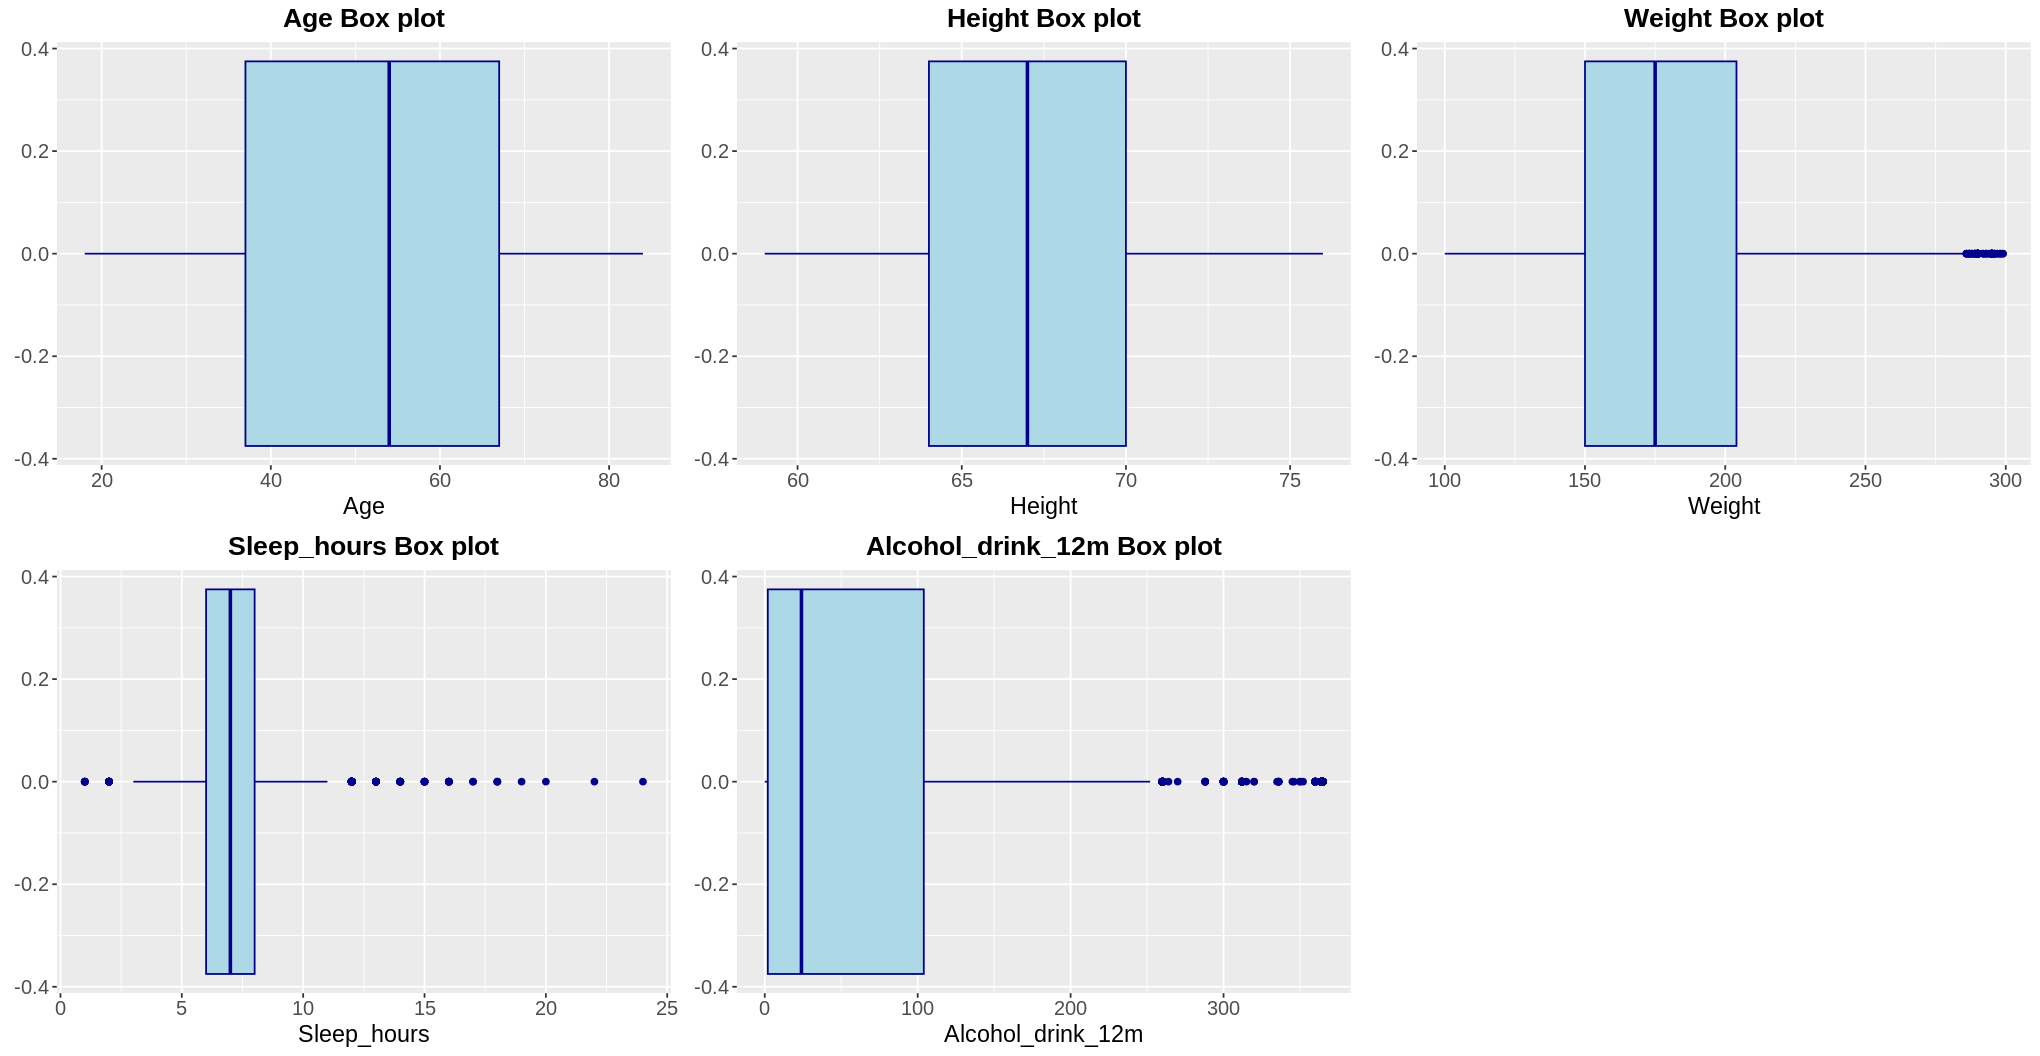

In [6]:
# Function to create boxplot for a given column
plot_boxplot <- function(data, col_name) {
  ggplot(data, aes(x = .data[[col_name]])) +   # Dynamically reference column name

    # Add boxplot with custom colors
    geom_boxplot(fill = "lightblue", color = "darkblue") +
    # Add title and x-axis label
    labs(title = paste0(col_name, " Box plot"), x = col_name) +
    # Adjusting the text apperance.
    theme(axis.text.x = element_text(size=12),
      axis.text.y = element_text(size=12),
      axis.title.x = element_text(size=14),
      axis.title.y = element_text(size=14),
      plot.title = element_text(size=16, hjust = 0.5, face='bold'),
      plot.subtitle = element_text(size=14, hjust=0.5))
}

# Create a list of boxplots for each numeric column
plots <- lapply(names(df[, num_cols]), function(col_name) {
  plot_boxplot(df[, num_cols], col_name)
})

# Arranging all the plots in a grid layout with 3 columns
grid.arrange(grobs = plots, ncol = 3)

* **Age** - The boxplot for Age shows a slight left-skewed distribution, with the median closer to Q3. This suggests the sampled adult population is slightly older overall. The absence of outliers indicates that age values are well-contained within the expected range.

* **Height** - The boxplot for Height exhibits an approximately symmetric distibribution, with the median fairly centered within the interquartile range (iqr). the absence of outliers suggests consistent heights across the sampled adults, with no extreme values.

* **Weight** -  The boxplot for Weight shows a slight right-skewed distribution, with the median closer to Q1. The cluster of outliers above the upper whisker indicates a group of individuals with significantly higher weights compared to the norm, which contributes to the skew.

* **Sleep_hours** - The boxplot for Sleep Hours is relatively symmetric, with the median centered within the iqr. However, the presence of outliers below the lower and upper whiskers creates the impression of a right-skewed distribution. Extreme values, such as those reporting 24 hours of sleep, are a little suspect (potentially indicating entering in data entry error or the sampled adult misunderstanding the question).

* **Alcohol_drink_12m** - The boxplot for Alcohol Consumption shows a right-skewed distribution, with the median closer to Q1. This suggest that the majority of individuals consume alcohol infrequently. The presence of outliers above the upper whisker points to a subgroup of individuals who drink heavily.

## Categorical Variables

In [7]:
# Creating a vector for the categorical column names
cat_cols <- c('Sex', 'Cancer', 'Coronary_heart_disease', 'Depression', 'Smoked_100_cig',
              'Education', 'Region', 'Anxiety','Aerobic.Strength')
# Creating a copy of df
df_copy <- copy(df)

# Converting below columns in the df_copy dataframe to factors with original labels.
df_copy$Sex <- factor(df_copy$Sex, labels=c('Male', 'Female'))
df_copy$Cancer <- factor(df_copy$Cancer, labels=c('Yes','No'))
df_copy$Coronary_heart_disease <- factor(df_copy$Coronary_heart_disease, labels = c('Yes', 'No'))
df_copy$Depression <- factor(df_copy$Depression, labels = c('Yes','No'))
df_copy$Smoked_100_cig <- factor(df_copy$Smoked_100_cig, labels = c('Yes', 'No'))
df_copy$Education <- factor(df_copy$Education, labels = c('1-11', '12th', 'GED', 'High School', 'Some College', 'Assoc Tech', 'Assoc Acad', 'Bach', 'Mast', 'Prof'))
df_copy$Region <- factor(df_copy$Region, labels = c('Northeast', 'Midwest', 'South', 'West'))
df_copy$Anxiety <- factor(df_copy$Anxiety, labels = c('Daily', 'Weekly', 'Monthly', 'Few times Y', 'Never'))
df_copy$`Aerobic.Strength` <- factor(df_copy$`Aerobic.Strength`, labels = c('Neither', 'Strength', 'Aerobic', 'Both'))

### Barplots

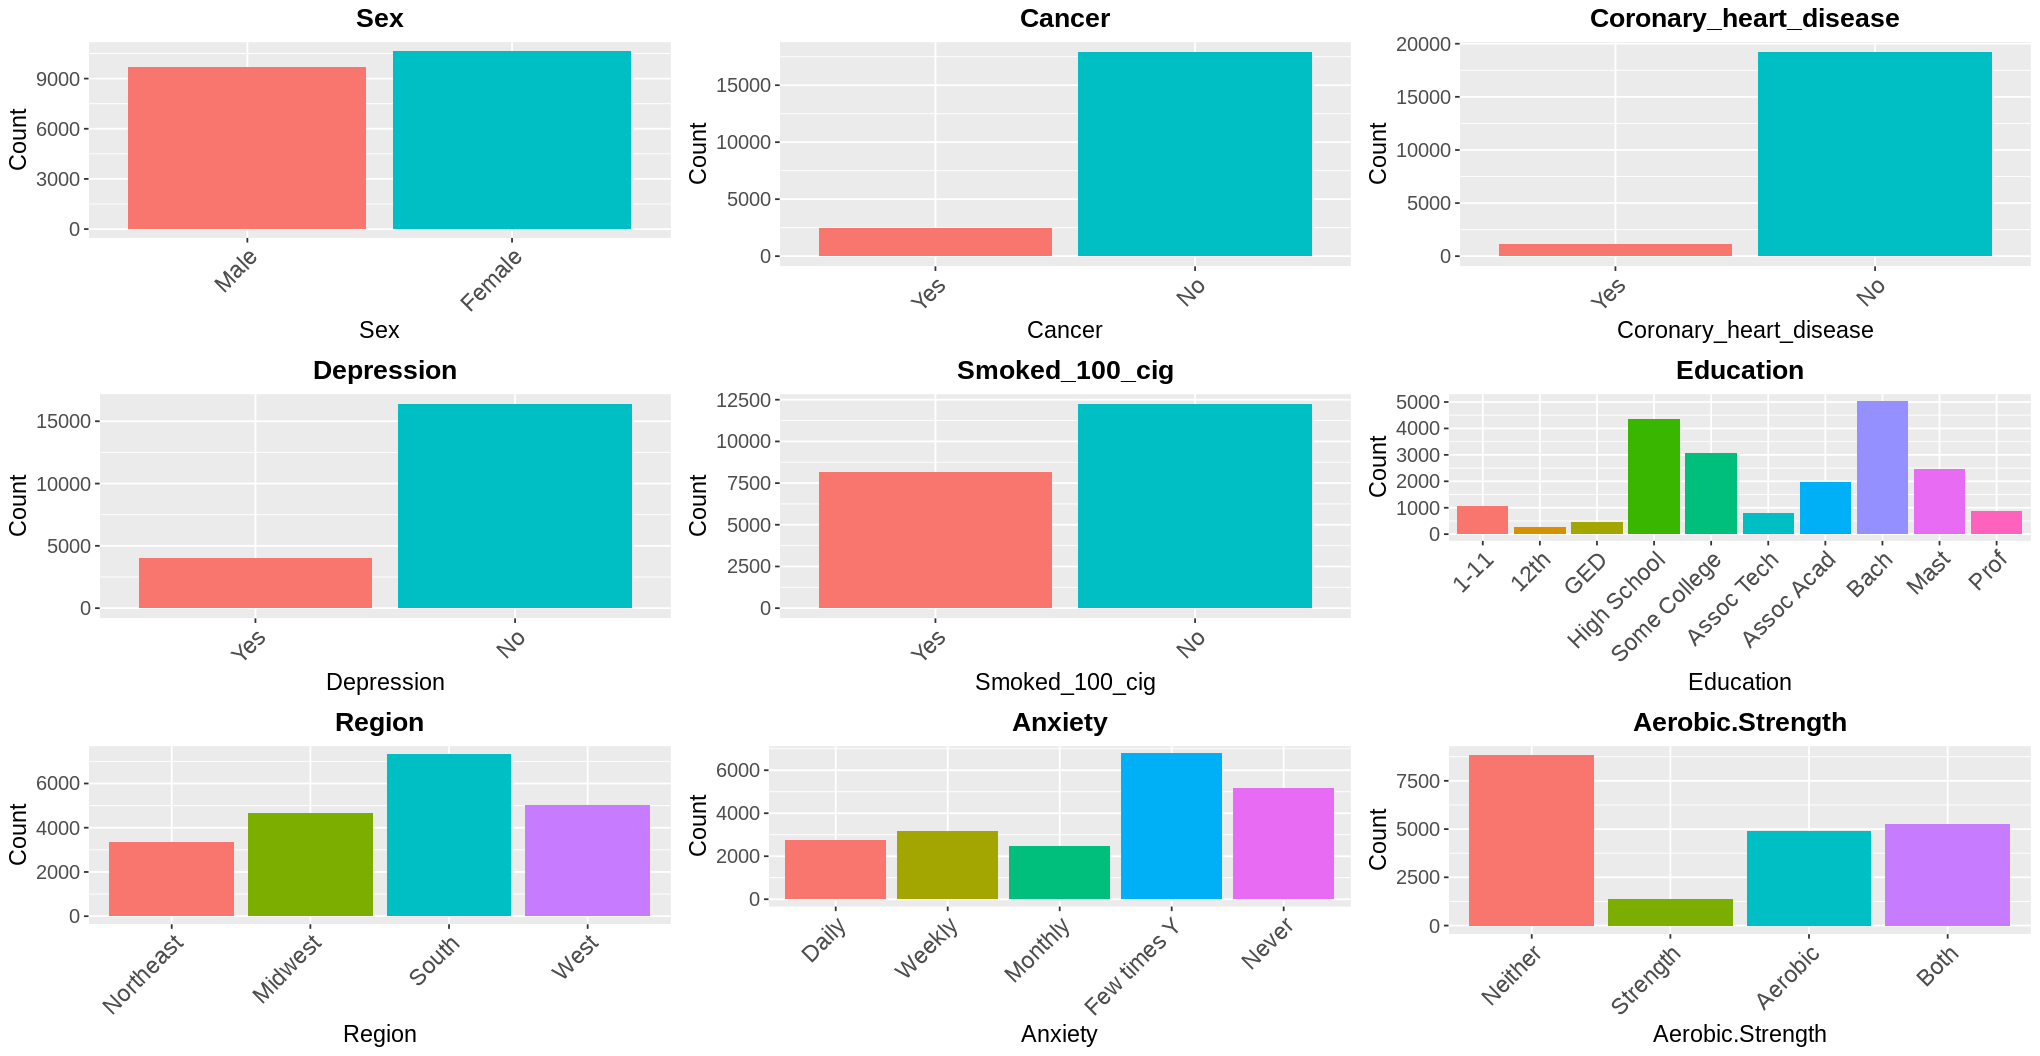

In [8]:
# Function to create a barplot for a given column
plot_bar <- function(data, col_name) {
  ggplot(data, aes(x = .data[[col_name]], fill = .data[[col_name]])) +  # Dynamically reference column name

    # Add barplot
    geom_bar() +
    # Add title and axis labels
    labs(title = col_name, x = col_name, y = "Count") +
    # Adjusting the text appearance
    theme(axis.text.x = element_text(size=14, angle = 45, hjust = 1),
          axis.text.y = element_text(size=12),
          axis.title.x = element_text(size=14),
          axis.title.y = element_text(size=14),
          plot.title = element_text(size=16, hjust = 0.5, face='bold'),
          plot.subtitle = element_text(size=14, hjust=0.5),
          legend.position = "none")
}

# Create a list of plots
plots <- lapply(names(df_copy[,cat_cols]), function(col_name) {
  plot_bar(df_copy[,cat_cols], col_name)
})

# Arrange all plots in a grid layout with 3 columns
grid.arrange(grobs = plots, ncol = 3)

* **Sex** - More females than males.
* **Cancer** - More people who've not been told they have cancer compared to those who've been told they have it.
* **Coronary_heart_disease** - More people who've not been told they have coronary heart disease compared to those who've been told they have it.
* **Depression** - More people who've not been told they have depression compared to those who've been told they have it.
* **Smoked_100_cig** - More people who've not smoked 100 cigarettes compared to those who have.
* **Education** - Most common education was a Bachelor's degree with 12th grade (no diploma) being the least common.
* **Region** - Most common region was the South region while the Northeast was the least common.
* **Anxiety** - Most common was a few times a year while the least common seems to be monthly.
* **Aerobic.Strength** - Most common was neither while the least common was meeting the the strength guidline only.

### Proportion tables

In [9]:
# Creating loop to go through every column name from df_copy that is a factor variable type
for (col in names(df_copy[, sapply(df_copy, is.factor)])) {
  # Creating proportions table based on the selected variable
  proportions <- prop.table(table(df_copy[[col]]))
  # Creating a heading
  cat(col, ':\n')
  # Outputing the proportion table while multiplying values by 100 and rounding.
  print(round(proportions * 100, 2))
  # Moving next text to a new line
  cat('\n')
  # Outputing horizontal line to separate each table
  cat('---------------------------------------------------------------------------------------\n')
}

Sex :

  Male Female 
  47.7   52.3 

---------------------------------------------------------------------------------------
Cancer :

  Yes    No 
12.17 87.83 

---------------------------------------------------------------------------------------
Coronary_heart_disease :

  Yes    No 
 5.74 94.26 

---------------------------------------------------------------------------------------
Depression :

  Yes    No 
19.66 80.34 

---------------------------------------------------------------------------------------
Smoked_100_cig :

  Yes    No 
39.96 60.04 

---------------------------------------------------------------------------------------
Education :

        1-11         12th          GED  High School Some College   Assoc Tech 
        5.22         1.42         2.25        21.33        15.05         3.91 
  Assoc Acad         Bach         Mast         Prof 
        9.67        24.78        12.07         4.30 

--------------------------------------------------------------------

* **Sex** - 52.3% of the sampled adults are female while 47.7% are male.
* **Cancer** - 87.83% of the sampled adults haven't been told they have cancer while 12.17% have been told they have cancer.
* **Coronary_heart_disease** - 94.26% of the sampled adults haven't been told they have coronary heart disease while 5.74% have been told they have coronary heart disease.
* **Depression** - 80.34% of the sampled adults haven't been told they have depression while 19.66% have been told they have depression.
* **Smoked_100_cig** - 60.04% of the sampled adults haven't smoked 100 cigarettes while 39.96% have smoked 100 cigarettes.
* **Education** - 24.78% of the sampled adults have a Bachelor's degree, 21.33% have a High School diploma, 15.05% have  completed some college, 12.07% have a Master's degree, 9.67% have an Academic Associate's degree, 5.22% have completed 1-11th grade of school, 4.3% have completed a professional degree (PhD, Doctorate, etc), 3.91% have completed a Technical Associate's degree, 2.25% have a General Education Degree, and 1.42% have 12th grade but no diploma.  
* **Region** - 35.97% of the sampled adults are from the South, 24.68% are from the West, 22.83% are from the Midwest, and 16.52% are from the Northeast.
* **Anxiety** - 33.31% of the sampled adults have felt anxious (or worried/nervous) a few times a year, 25.35% never did, 15.58% felt it weekly, 13.54% felt it daily, and 12.22 felt it monthly.
* **Aerobic.Strength** - 43.49% of the sampled adults meet neither guidelines, 25.81% meet both the strength and aerobic guidelines, 24.06% meet only the aerobic guideline, and 6.64% meet only the strength guidelines.